# 8.1

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.optimize
import sympy
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
import pandas as pd
import sympy as sm
import mpmath


In [46]:
def f15(y0,y_prime_0,h):
    x=np.arange(0.1,1.5,h)
    y=np.zeros(len(x))
    y_prime=np.zeros(len(x))
    y[0]=y0
    y_prime[0]=y_prime_0
    for i in range(len(x)-1):
        y_prime[i+1]=y_prime[i]+h*(-y_prime[i]+6*x[i]*y[i]+x[i]+np.sin(y[i]))/x[i]
        y[i+1]=y[i]+y_prime[i+1]*h
    return y_prime[len(x)-1]-1.8

In [47]:
def f05(y0,y_prime_0,h):
    x=np.arange(0.1,0.5,h)
    y=np.zeros(len(x))
    y_prime=np.zeros(len(x))
    y[0]=y0
    y_prime[0]=y_prime_0
    for i in range(len(x)-1):
        y_prime[i+1]=y_prime[i]+h*(-y_prime[i]+6*x[i]*y[i]+x[i]+np.sin(y[i]))/x[i]
        y[i+1]=y[i]+y_prime[i+1]*h
    return y[len(x)-1]-1.2

In [48]:
def jacobian(f,x):
    '''f is list of function\nx is list of points to calculate jacobian'''
    eps = 1e-8
    N = len(f)
    J = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[j] = x_plus[j] + eps
            x_minus[j] = x_minus[j] - eps
            J[i,j] = (f[i](*x_plus) - f[i](*x_minus))/eps * 0.5
    return J

In [49]:
def user_gaussian_solve_pp(a,b):
    A = np.hstack((a,b))
    N = A.shape[0]
    for k in range(N-1):
        maxidx = np.abs(A[k:,k]).argmax() + k #get index of the max arg
        # +k is needed, because, argmax restart at 0 for the new slice
        if k != maxidx:
            A[[k,maxidx]] = A[[maxidx, k]]
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, N+1):
                A[i,j] = A[i,j] + r * A[k,j]

    A[N-1,N] = A[N-1,-1] / A[N-1, -2]
    for i in range(N-2, -1, -1): #2, 1, 0
        sum = 0
        for j in range(i+1, N): #i+1 to N-1
            sum = sum + A[i,j] * A[j,N]
        A[i,N] = (A[i,N] - sum)/A[i,i]
    return A[:,N][:,np.newaxis]

In [50]:
def newton_jacobian(f,x0, print_option = False, print_option2 = True):
    """f is list of function, x is list of initial guess value"""
    norm = 1
    maxitx = 100
    eps = 1e-8
    x = x0.copy()
    for k in range(maxitx):
        if print_option:
            print(x)
        jac_np = jacobian(f,x)
        minus_f = np.array([- f[i](*x) for i in range(len(f))])[:,np.newaxis]
        delta_x_np = user_gaussian_solve_pp(jac_np,minus_f)
        if np.linalg.norm(delta_x_np) < eps:
            break
        x = [x[i] + delta_x_np.reshape((1,-1))[0].tolist()[i] for i in range(len(f))]
        
    if print_option2:
        print('number of iteration = ',k+1)
    return x

In [51]:
h=0.001
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05(y0,y_prime_0,h))
f.append(lambda y0,y_prime_0: f15(y0,y_prime_0,h))
ans = newton_jacobian(f,[0,1])

number of iteration =  6


In [52]:
f15(ans[0],ans[1],h)
ans

[6.695990774897926, -41.29252382722291]

In [53]:
f05(ans[0],ans[1],h)

2.1370683001009638e-11

number of iteration =  8
number of iteration =  6


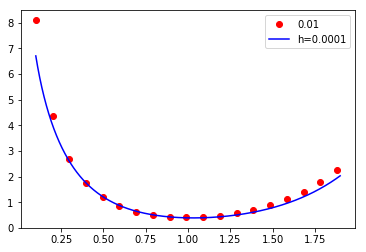

In [54]:
h=0.099
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05(y0,y_prime_0,h))
f.append(lambda y0,y_prime_0: f15(y0,y_prime_0,h))
ans = newton_jacobian(f,[0,1])
x=np.arange(0.1,1.9,h)
y=np.zeros(len(x))
B=np.zeros(len(x))
y_prime=np.zeros(len(x))
y[0]=ans[0]
y_prime[0]=ans[1]
B[0]=y[0]
for i in range(len(x)-1):
    y_prime[i+1]=y_prime[i]+h*(-y_prime[i]+6*x[i]*y[i]+x[i]+np.sin(y[i]))/x[i]
    y[i+1]=y[i]+y_prime[i+1]*h
    B[i+1]=y[i+1]
xUh_large=x
yUh_large=B
plt.plot(x,B, 'ro', label="0.01")
plt.legend()

h0=0.0001
y00,y_prime_00 = sympy.symbols('y0,y_prime_0')
f0=[]
f0.append(lambda y00,y_prime_00: f05(y00,y_prime_00,h0))
f0.append(lambda y00,y_prime_00: f15(y00,y_prime_00,h0))
ans0 = newton_jacobian(f0,[0,1])
x0=np.arange(0.1,1.9,h0)
y0=np.zeros(len(x0))
y_prime0=np.zeros(len(x0))
y0[0]=ans0[0]
y_prime0[0]=ans0[1]
for i in range(len(x0)-1):
    y_prime0[i+1]=y_prime0[i]+h0*(-y_prime0[i]+6*x0[i]*y0[i]+x0[i]+np.sin(y0[i]))/x0[i]
    y0[i+1]=y0[i]+y_prime0[i+1]*h0  
xUh_small=x0
yUh_small=y0
plt.plot(x0,y0, '-b', label="h=0.0001")
plt.legend()

# 8.2

In [55]:
h=0.001
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05(y0,y_prime_0,h))
f.append(lambda y0,y_prime_0: f15(y0,y_prime_0,h))
ans = newton_jacobian(f,[0,1])
sol2 = []
def solout2(t,y):
    sol2.append([t,*y])
    return None
q82 = lambda x,y: [y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]
q2_ode = integrate.ode(q82)
q2_ode.set_integrator('dopri5')
q2_ode.set_initial_value([ans[0],ans[1]],0.1)
q2_ode.set_solout(solout2)
q2_ode.integrate(2)

number of iteration =  6


array([0.97325656, 2.50750035])

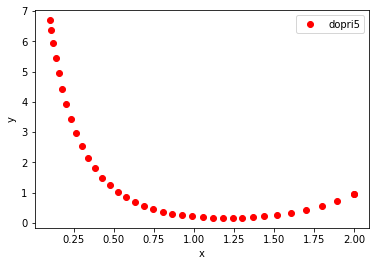

In [56]:
sol2np = np.array(sol2)
plt.plot(sol2np[:,0],sol2np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [57]:
def solout2(t,y):
    sol2.append([t,*y])
    return None
def f15D(y0,y_prime_0):
    q82 = lambda x,y: [y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]
    q2_ode = integrate.ode(q82)
    q2_ode.set_integrator('dopri5')
    q2_ode.set_initial_value([y0,y_prime_0],0.1)
    q2_ode.set_solout(solout2)
    q2_ode.integrate(1.5)
    sol2np = np.array(sol2)
    return (sol2np[len(sol2np)-1,1]-sol2np[len(sol2np)-2,1])/(sol2np[len(sol2np)-1,0]-sol2np[len(sol2np)-2,0])-1.8

def f05D(y0,y_prime_0):
    q82 = lambda x,y: [y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]
    q2_ode = integrate.ode(q82)
    q2_ode.set_integrator('dopri5')
    q2_ode.set_initial_value([y0,y_prime_0],0.1)
    q2_ode.set_solout(solout2)
    q2_ode.integrate(0.5)
    sol2np = np.array(sol2)
    return sol2np[len(sol2np)-1,1]-1.2

In [58]:
h=0.01
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05D(y0,y_prime_0))
f.append(lambda y0,y_prime_0: f15D(y0,y_prime_0))
ans = newton_jacobian(f,[0,1])

number of iteration =  9


In [59]:
f15D(ans[0],ans[1])

8.480327551296796e-12

In [60]:
f05D(ans[0],ans[1])

0.0

In [61]:
sol2=[]
def solout2(t,y):
    sol2.append([t,*y])
    return None
q82 = lambda x,y: [y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]
q2_ode = integrate.ode(q82)
q2_ode.set_integrator('dopri5')
q2_ode.set_initial_value([ans[0],ans[1]],0.1)
q2_ode.set_solout(solout2)
q2_ode.integrate(1.9)



array([2.27270182, 5.36218203])

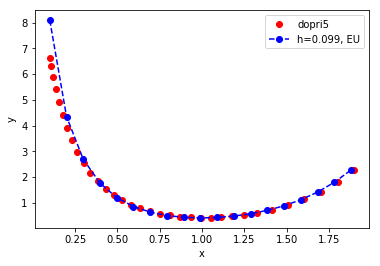

In [62]:
sol2np = np.array(sol2)
xD=sol2np[:,0]
yD=sol2np[:,1]
plt.plot(sol2np[:,0],sol2np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,B, '--ob', label="h=0.099, EU")
plt.legend()
plt.show()

# 8.3

In [63]:
def LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [ans[0],ans[1]], a = 0.1, b = 1.9, h = 0.1):
    
    def fn_LIIIC(k,x0,y0,h):
        """This is function to be used in LobattoIIIC"""
        k = k.reshape(3,-1)
        k1 = k[0]
        k2 = k[1]
        k3 = k[2]

        #instead of append, make 4 by n array. Output the flatten f
        f = np.array([(k1-fn(x0,y0 + h*(1/6*k1 - 1/3*k2
            + 1/6*k3)))])
        f = np.r_[f,[(k2-fn(x0 + 0.5*h, y0 + h*(1/6*k1 
            + 5/12*k2 - 1/12*k3)))]]
        f = np.r_[f,[(k3-fn(x0 + 1*h, y0 + h*(1/6*k1 
            + 2/3*k2 + 1/6*k3)))]]
        return f.reshape(-1)
   
    n = int(np.abs((a-b)/h)) #number of interval
    n = int(np.abs((b-a)/h)) #number of interval
    y = np.array([ic])
    x = np.linspace(a,b,n+1)
    #initial guess
    k1 = y
    k2 = y
    k3 = y
    for i in range(n):
        yi = y[i]
        xi = x[i]
        #send horizontal vector to fsolve
        k_ans = fsolve(fn_LIIIC,
            np.r_[k1,k2,k3].reshape(-1), args=(xi,yi,h))
        k1,k2,k3 = k_ans.reshape(3,-1)
        y_next = yi + h*(1/6*k1 + 2/3*k2 + 1/6*k3)
        y = np.r_[y,[y_next]]
    return x,y

In [64]:
x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(b = 1.9, ic = [ans[0],ans[1]])

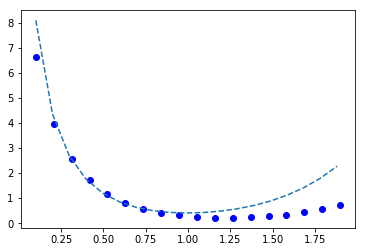

In [65]:
plt.plot(x3_LIIIC_many,y3_LIIIC_many[:,0],'bo')
plt.plot(x,B, '--', label="h=0.099, EU")

# h=0.1

In [66]:
def f15L(y0,y_prime_0):
    x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [y0,y_prime_0], a = 0.1, b = 1.5, h = 0.1)
    return (y3_LIIIC_many[len(x3_LIIIC_many)-1,0]-y3_LIIIC_many[len(x3_LIIIC_many)-2,0])/(x3_LIIIC_many[len(x3_LIIIC_many)-1]-x3_LIIIC_many[len(x3_LIIIC_many)-2])-1.8
    #return 2
def f05L(y0,y_prime_0):
    x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [y0,y_prime_0], a = 0.1, b = 0.5, h = 0.1)
    return y3_LIIIC_many[len(x3_LIIIC_many)-1,0]-1.2

In [67]:
f15L(ans[0],ans[1])

-1.6757101610072545

In [68]:
f05L(ans[0],ans[1])

0.007399758123227018

In [69]:
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05L(y0,y_prime_0))
f.append(lambda y0,y_prime_0: f15L(y0,y_prime_0))
ans = newton_jacobian(f,[0,1])

number of iteration =  6


In [70]:
f05L(ans[0],ans[1])


9.917111576385196e-11

In [71]:
f15L(ans[0],ans[1])

1.23186993938873e-09

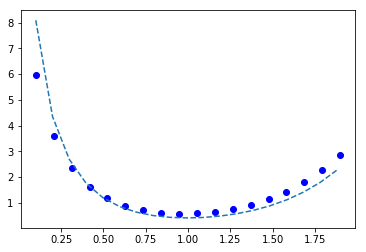

In [72]:
x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(b = 1.9, ic = [ans[0],ans[1]])
plt.plot(x3_LIIIC_many,y3_LIIIC_many[:,0],'bo')
plt.plot(x,B, '--', label="h=0.099, EU")
xLh_large=x3_LIIIC_many
yLh_large=y3_LIIIC_many[:,0]

# h=0.001

In [73]:
def f15Lh(y0,y_prime_0):
    x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [y0,y_prime_0], a = 0.1, b = 1.5, h = 0.001)
    return (y3_LIIIC_many[len(x3_LIIIC_many)-1,0]-y3_LIIIC_many[len(x3_LIIIC_many)-2,0])/(x3_LIIIC_many[len(x3_LIIIC_many)-1]-x3_LIIIC_many[len(x3_LIIIC_many)-2])-1.8
    #return 2
def f05Lh(y0,y_prime_0):
    x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [y0,y_prime_0], a = 0.1, b = 0.5, h = 0.001)
    return y3_LIIIC_many[len(x3_LIIIC_many)-1,0]-1.2

In [74]:
y0,y_prime_0 = sympy.symbols('y0,y_prime_0')
f=[]
f.append(lambda y0,y_prime_0: f05Lh(y0,y_prime_0))
f.append(lambda y0,y_prime_0: f15Lh(y0,y_prime_0))
ans = newton_jacobian(f,[0,1])

number of iteration =  6


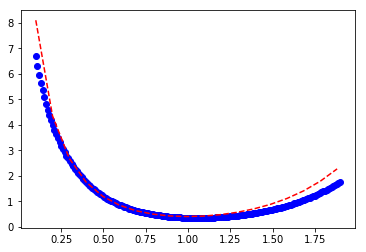

In [75]:
x3_LIIIC_many, y3_LIIIC_many=LobattoIIIC_many(fn = lambda x,y: np.array([y[1], (-y[1]+6*x*y[0]+x+np.sin(y[0]))/x]),
                ic = [ans[0],ans[1]], a = 0.1, b = 1.9, h = 0.01)
plt.plot(x3_LIIIC_many,y3_LIIIC_many[:,0],'bo')
plt.plot(x,B, '--r', label="h=0.099, EU")
xLh_small=x3_LIIIC_many
yLh_small=y3_LIIIC_many[:,0]

# 8.4

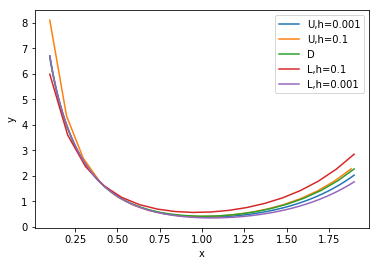

In [78]:
plt.plot(xUh_small,yUh_small,label = 'U,h=0.001')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xUh_large,yUh_large,label = 'U,h=0.1')
plt.plot(xD,yD,label = 'D')
plt.plot(xLh_large,yLh_large,label = 'L,h=0.1')
plt.plot(xLh_small,yLh_small,label = 'L,h=0.001')
plt.legend()
plt.show()